In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


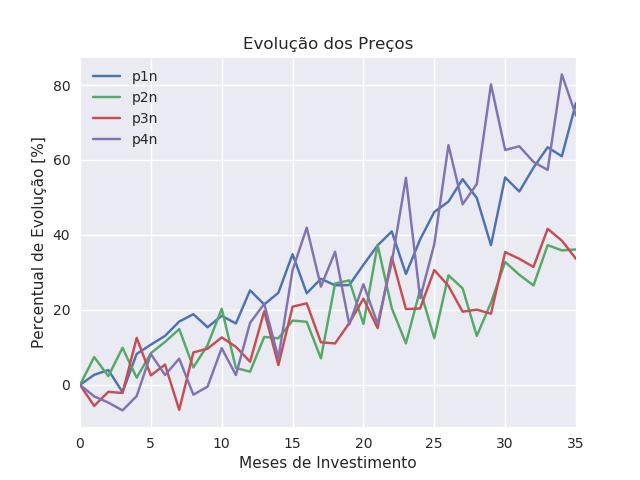

Text(0.5,0,'Meses de Investimento')

In [5]:
po=10
mu=.015
sigma=.04
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p1=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

po=12
mu=.008
sigma=.06
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

po=9
mu=.01
sigma=.05
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p3=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

po=13
mu=.02
sigma=.07
w = np.random.normal(0,1, 36)
t=np.arange(0,36)
p4=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

dfp=pd.DataFrame(p1)
dfp.columns=['p1']
dfp['p2']=p2
dfp['p3']=p3
dfp['p4']=p4
df=dfp.pct_change()

df.iloc[0]=[0, 0, 0, 0]
df.columns=['r1','r2','r3','r4']

dfp['p1n']=(100*dfp.iloc[:,0]/dfp.iloc[0,0])-100
dfp['p2n']=(100*dfp.iloc[:,1]/dfp.iloc[0,1])-100

dfp['p3n']=(100*dfp.iloc[:,2]/dfp.iloc[0,2])-100
dfp['p4n']=(100*dfp.iloc[:,3]/dfp.iloc[0,3])-100
dfp[['p1n','p2n','p3n','p4n']].plot()
plt.title('Evolução dos Preços')
plt.ylabel('Percentual de Evolução [%]')
plt.xlabel('Meses de Investimento')


In [6]:
C=df.cov()
sig=df.std()
MU=df.mean()
I=pd.DataFrame(np.identity(4))
SIGMA=(C*(I.values))**0.5
P=df.corr()
ONE=[1,1,1,1]
N=1000
ret=pd.DataFrame(np.zeros((N,1)))
risk=pd.DataFrame(np.zeros((N,1)))
MU

r1    0.016902
r2    0.012049
r3    0.011053
r4    0.020583
dtype: float64

<IPython.core.display.Javascript object>


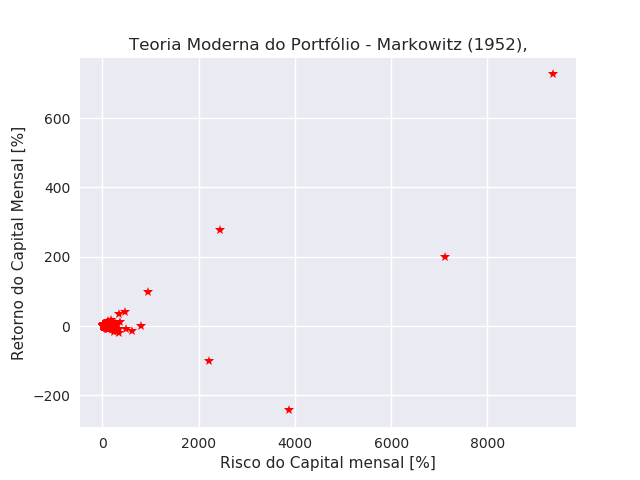

Text(0.5,0,'Risco do Capital mensal [%]')

In [7]:
for i in range(0, N):
    qabs = np.random.normal(0,100, 4)  
    qmx=qabs.max()
    qn=qabs/qmx
    qn1=qn/qn.sum()
    q=qn1.round(2)
#    print(q)
    if i==1:
        q=[1/4,1/4,1/4,1/4]
    ret[0][i]=np.dot(pd.DataFrame(q).transpose(),MU)
    risk[0][i]=(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))**0.5

fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')

plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')



<IPython.core.display.Javascript object>


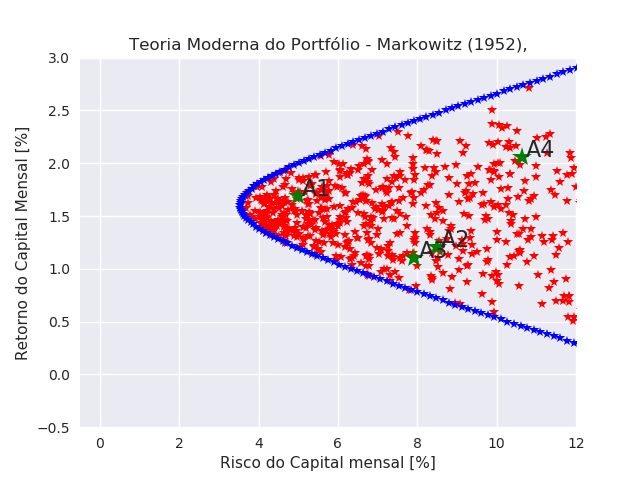

Text(0.5,0,'Risco do Capital mensal [%]')

In [8]:
a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
target_mus=np.arange(-0.1,0.1,0.0002)
risk_at_target_mus=np.zeros(len(target_mus))
for i in range(0, len(target_mus)):
    target_mu=target_mus[i]
    v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
    v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
    v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
    opt_q=(v1+v2)/v3
    risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')
plt.plot(100*risk_at_target_mus,100*target_mus,'b*')
plt.plot(100*sig[0], 100*MU[0], 'g*', markersize=15.0)  
plt.plot(100*sig[1], 100*MU[1], 'g*', markersize=15.0)  
plt.plot(100*sig[2], 100*MU[2], 'g*', markersize=15.0) 
plt.plot(100*sig[3], 100*MU[3], 'g*', markersize=15.0) 
plt.text(100*sig[0]+0.1, 100*MU[0],'A1' , fontsize=16)
plt.text(100*sig[1]+0.1, 100*MU[1],'A2' , fontsize=16)
plt.text(100*sig[2]+0.1, 100*MU[2],'A3' , fontsize=16)
plt.text(100*sig[3]+0.1, 100*MU[3],'A4' , fontsize=16)
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
plt.axis([-0.5,12,-0.5,3])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')


<IPython.core.display.Javascript object>


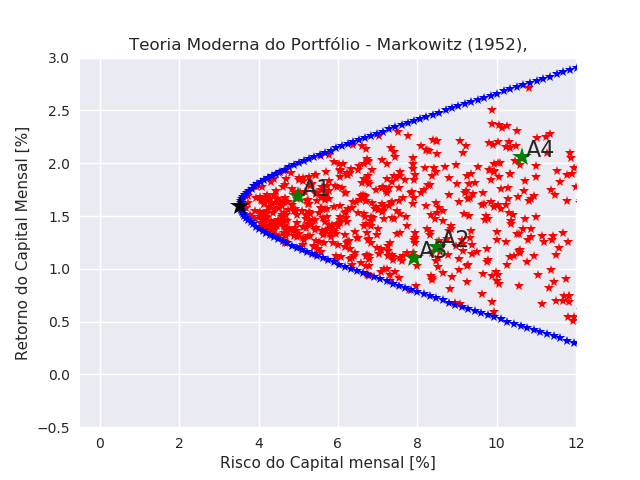

array([[ 0.53079758],
       [ 0.18643972],
       [ 0.11357572],
       [ 0.16918697]])

In [9]:
q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5

fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')
plt.plot(100*risk_at_target_mus,100*target_mus,'b*')
plt.plot(100*sig[0], 100*MU[0], 'g*', markersize=15.0)  
plt.plot(100*sig[1], 100*MU[1], 'g*', markersize=15.0)  
plt.plot(100*sig[2], 100*MU[2], 'g*', markersize=15.0) 
plt.plot(100*sig[3], 100*MU[3], 'g*', markersize=15.0) 
plt.text(100*sig[0]+0.1, 100*MU[0],'A1' , fontsize=16)
plt.text(100*sig[1]+0.1, 100*MU[1],'A2' , fontsize=16)
plt.text(100*sig[2]+0.1, 100*MU[2],'A3' , fontsize=16)
plt.text(100*sig[3]+0.1, 100*MU[3],'A4' , fontsize=16)

plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15)
plt.axis([-0.5,12,-0.5,3])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')
q_minrisk

In [10]:
q_minrisk

array([[ 0.53079758],
       [ 0.18643972],
       [ 0.11357572],
       [ 0.16918697]])

<IPython.core.display.Javascript object>


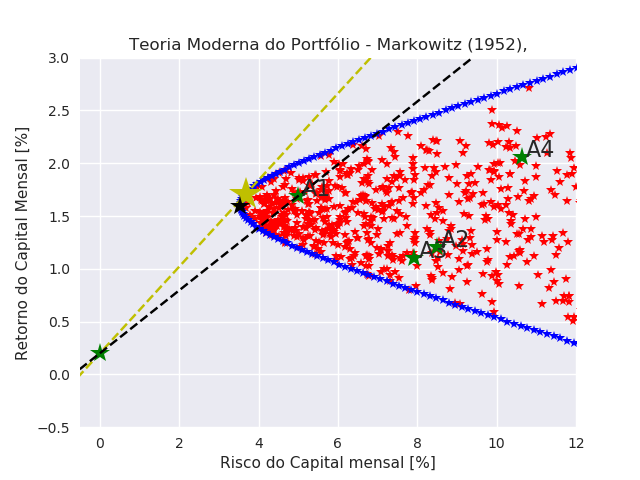

Text(0.5,0,'Risco do Capital mensal [%]')

In [11]:
rf=0.002
temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
qm=temp/temp.sum()
mu_m=np.dot(qm.transpose(),MU)
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
cm_line=sigma_m[0][0]*(target_mus-rf)/(mu_m-rf)
arbitrary_line=sig[0]*(target_mus-rf)/(MU[0]-rf)

fig = plt.subplots()
plt.plot(100*risk,100*ret,'r*')
plt.plot(100*risk_at_target_mus,100*target_mus,'b*')
plt.plot(100*sig[0], 100*MU[0], 'g*', markersize=15.0)  
plt.plot(100*sig[1], 100*MU[1], 'g*', markersize=15.0)  
plt.plot(100*sig[2], 100*MU[2], 'g*', markersize=15.0) 
plt.plot(100*sig[3], 100*MU[3], 'g*', markersize=15.0) 
plt.text(100*sig[0]+0.1, 100*MU[0],'A1' , fontsize=16)
plt.text(100*sig[1]+0.1, 100*MU[1],'A2' , fontsize=16)
plt.text(100*sig[2]+0.1, 100*MU[2],'A3' , fontsize=16)
plt.text(100*sig[3]+0.1, 100*MU[3],'A4' , fontsize=16)
plt.plot(100*cm_line,100*target_mus,'y--')
plt.plot(0, 100*rf, 'g*', markersize=15.0)
plt.plot(100*sigma_m,100*mu_m,'y*',markersize=25.0)
plt.plot(100*arbitrary_line, 100*target_mus, 'k--');
plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15)
plt.axis([-0.5,12,-0.5,3])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital Mensal [%]')
plt.xlabel('Risco do Capital mensal [%]')


<IPython.core.display.Javascript object>


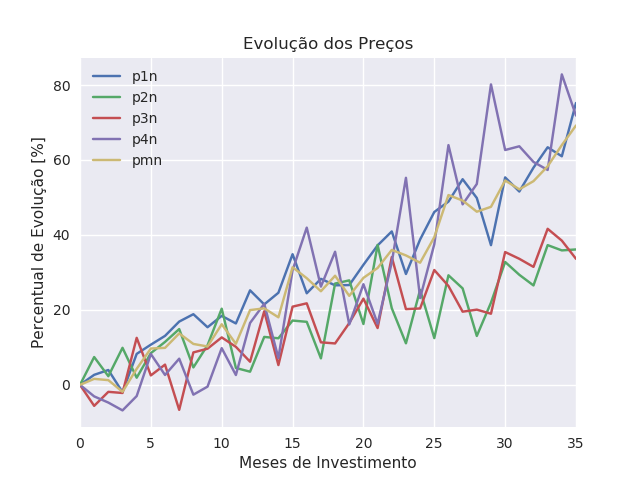

Text(0.5,0,'Meses de Investimento')

In [12]:
#fig = plt.subplots()
dfp['p1n']=(100*dfp.iloc[:,0]/dfp.iloc[0,0])-100
dfp['p2n']=(100*dfp.iloc[:,1]/dfp.iloc[0,1])-100
dfp['p3n']=(100*dfp.iloc[:,2]/dfp.iloc[0,2])-100
dfp['p4n']=(100*dfp.iloc[:,3]/dfp.iloc[0,3])-100
#dfp[['p1n','p2n','p3n','p4n']].plot()
dfp['pm']=qm[0]*dfp['p1']+qm[1]*dfp['p2']+qm[2]*dfp['p3']+qm[3]*dfp['p4']
dfp['pmn']=(100*dfp.iloc[:,8]/dfp.iloc[0,8])-100
dfp[['p1n','p2n','p3n','p4n','pmn']].plot()
plt.title('Evolução dos Preços')
plt.ylabel('Percentual de Evolução [%]')
plt.xlabel('Meses de Investimento')

In [ ]:
qm






In [13]:
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['BBAS3','LCAM3', 'TECN3','NATU4']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


[*********************100%***********************]  4 of 4 downloaded

In [3]:
stocks_close=stocks_all['Close']
#stocks_close.plot()
#stocks_close.tail()
stocks_all

Open                           High                      \
             BBAS3.SA   LCAM3.SA TECN3.SA   BBAS3.SA   LCAM3.SA TECN3.SA   
Date                                                                       
2016-07-14  18.400000   4.890000     4.79  19.129999   4.890000     4.90   
2016-07-15  18.940001   4.850000     4.90  19.400000   4.850000     4.93   
2016-07-18  19.299999   4.790000     4.90  19.959999   4.790000     4.93   
2016-07-19  19.889999   4.720000     4.90  20.930000   4.940000     4.93   
2016-07-20  21.000000   4.930000     4.95  21.510000   5.030000     4.99   
2016-07-21  21.299999   4.980000     4.85  21.469999   5.040000     4.88   
2016-07-22  20.900000   5.020000     4.72  21.260000   5.020000     4.90   
2016-07-25  20.690001   4.990000     4.90  21.299999   5.070000     5.00   
2016-07-26  21.350000   5.030000     4.81  21.719999   5.040000     4.89   
2016-07-27  21.500000   5.060000     4.91  21.900000   5.080000     5.05   
2016-07-28  21.250000   5.070000     5.07  21.250000   5.080000     5.09   
2016-07-29  20.660000   5.070000     4.90  21.190001   5.070000     5.15   
2016-08-01  21.139999   5.010000     5.15  21.340000   5.080000     5.22   
2016-08-02  20.500000   5.080000     5.44  20.870001   5.080000     5.57   
2016-08-03  20.100000   5.070000     5.31  20.680000   5.080000     5.42   
2016-08-04  20.719999   5.080000     5.38  21.100000   5.080000     5.40   
2016-08-05  21.299999   5.060000     5.38  21.480000   5.500000     5.48   
2016-08-08  21.080000   5.890000     5.55  21.360001   5.890000     5.55   
2016-08-09  21.230000   5.500000     5.08  21.549999   5.580000     5.20   
2016-08-10  21.469999   5.590000     5.18  21.600000   5.590000     5.18   
2016-08-11  20.809999   5.310000     5.20  22.059999   5.340000     5.31   
2016-08-12  22.049999   5.200000     5.34  22.820000   5.300000     5.35   
2016-08-15  22.730000   5.290000     5.35  23.219999   5.300000     5.35   
2016-08-16  22.930000   5.200000     5.16  23.200001   5.280000     5.28   
2016-08-17  22.700001   5.110000     5.10  22.770000   5.260000     5.10   
2016-08-18  22.790001   5.180000     5.06  22.920000   5.180000     5.07   
2016-08-19  22.600000   4.990000     4.94  23.250000   5.190000     4.99   
2016-08-22  23.180000   5.030000     4.95  23.200001   5.030000     5.08   
2016-08-23  22.500000   4.880000     5.00  22.809999   5.000000     5.00   
2016-08-24  22.410000   4.830000     4.96  22.620001   4.970000     4.96   
...               ...        ...      ...        ...        ...      ...   
2018-06-04  31.219999  24.090000     1.80  31.400000  26.139999     1.86   
2018-06-05  30.850000  25.750000     1.84  30.959999  26.450001     1.87   
2018-06-06  29.000000  24.500000     1.84  29.240000  24.799999     1.86   
2018-06-07  27.100000  24.750000     1.77  27.270000  24.750000     1.79   
2018-06-08  26.850000  23.520000     1.71  27.780001  23.549999     1.81   
2018-06-11  27.400000  22.260000     1.73  27.600000  23.309999     1.73   
2018-06-12  26.299999  23.309999     1.68  27.320000  23.309999     1.70   
2018-06-13  27.000000  22.600000     1.64  27.250000  23.620001     1.69   
2018-06-14  26.750000  23.340000     1.64  26.879999  23.860001     1.73   
2018-06-15  25.299999  22.730000     1.58  25.400000  22.940001     1.60   
2018-06-18  24.780001  22.299999     1.51  25.350000  22.320000     1.54   
2018-06-19  24.260000  22.010000     1.51  26.799999  22.700001     1.81   
2018-06-20  26.670000  22.490000     1.75  27.030001  23.200001     1.80   
2018-06-21  26.780001  23.490000     1.80  26.980000  23.639999     1.80   
2018-06-22  26.330000  23.000000     1.68  26.620001  23.209999     1.70   
2018-06-25  26.350000  22.760000     1.60  27.000000  22.870001     1.65   
2018-06-26  27.059999  23.000000     1.60  27.480000  23.820000     1.76   
2018-06-27  27.180000  22.480000     1.74  28.170000  23.750000     1.85   
2018-06-28  26.530001  23.040001     1.76  28.150000  23.559999  

In [4]:
a=[1,2,3]

In [8]:
len([])

0